#  Cartola Classification


##  Read the data


In [1]:
# put your code here
import pandas as pd

#Dados acumulados da rodada 30 de 2018
rodada = pd.read_csv("rodada-30.csv")
rodada.columns
#rodada.head()
#rodada.shape
#rodada['atletas.clube.id.full.name']

Index(['Unnamed: 0', 'atletas.nome', 'atletas.slug', 'atletas.apelido',
       'atletas.foto', 'atletas.atleta_id', 'atletas.rodada_id',
       'atletas.clube_id', 'atletas.posicao_id', 'atletas.status_id',
       'atletas.pontos_num', 'atletas.preco_num', 'atletas.variacao_num',
       'atletas.media_num', 'atletas.clube.id.full.name', 'CA', 'FC', 'FF',
       'FS', 'PE', 'RB', 'SG', 'A', 'CV', 'FD', 'G', 'I', 'FT', 'DD', 'DP',
       'GS', 'GC', 'PP'],
      dtype='object')

##  Drop unnecessary columns


In [2]:
unnecessary_columns = ['Unnamed: 0', 'atletas.slug', 'atletas.apelido', 'atletas.foto', 'atletas.atleta_id', 'atletas.rodada_id', 'atletas.clube_id']

filtered_rodada = rodada.drop(unnecessary_columns, axis=1)
filtered_rodada.head()


,atletas.nome,atletas.posicao_id,atletas.status_id,atletas.pontos_num,atletas.preco_num,atletas.variacao_num,atletas.media_num,atletas.clube.id.full.name,CA,FC,...,CV,FD,G,I,FT,DD,DP,GS,GC,PP
0,Juan Silveira dos Santos,zag,Contundido,0.0,5.74,0.00,1.55,Flamengo,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rafael Martiniano de Miranda Moura,ata,Nulo,-0.8,8.47,-0.43,2.07,América-MG,3.0,31.0,...,1.0,8.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Jonathan Cícero Moreira,lat,Dúvida,5.2,9.70,0.31,4.31,Atlético-PR,3.0,13.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Marcelo Mendonça de Mattos Terra,mei,Nulo,0.0,2.00,0.00,0.00,Vasco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Michel Fernandes Bastos,mei,Provável,1.1,4.64,0.14,2.61,Sport,1.0,15.0,...,NaN,3.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN


##  Replace NaN with zeros


In [3]:
filtered_rodada = filtered_rodada.fillna(0)
filtered_rodada.head()

,atletas.nome,atletas.posicao_id,atletas.status_id,atletas.pontos_num,atletas.preco_num,atletas.variacao_num,atletas.media_num,atletas.clube.id.full.name,CA,FC,...,CV,FD,G,I,FT,DD,DP,GS,GC,PP
0,Juan Silveira dos Santos,zag,Contundido,0.0,5.74,0.00,1.55,Flamengo,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Rafael Martiniano de Miranda Moura,ata,Nulo,-0.8,8.47,-0.43,2.07,América-MG,3.0,31.0,...,1.0,8.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jonathan Cícero Moreira,lat,Dúvida,5.2,9.70,0.31,4.31,Atlético-PR,3.0,13.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Marcelo Mendonça de Mattos Terra,mei,Nulo,0.0,2.00,0.00,0.00,Vasco,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Michel Fernandes Bastos,mei,Provável,1.1,4.64,0.14,2.61,Sport,1.0,15.0,...,0.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0


##  Exploring the data


In [0]:
print(filtered_rodada['atletas.posicao_id'].value_counts())
print(filtered_rodada['atletas.clube.id.full.name'].value_counts())

mei    268
ata    198
zag    139
lat    127
gol     89
tec     20
Name: atletas.posicao_id, dtype: int64
Grêmio           57
Atlético-PR      50
Vitória          48
Chapecoense      47
Flamengo         46
Vasco            45
Fluminense       44
Paraná           43
América-MG       42
Bahia            41
Palmeiras        40
Sport            39
Ceará            39
Internacional    39
Santos           38
Botafogo         38
Cruzeiro         38
São Paulo        37
Corinthians      36
Atlético-MG      34
Name: atletas.clube.id.full.name, dtype: int64


##  Distance between players


In [0]:
from sklearn.metrics.pairwise import euclidean_distances

distance = euclidean_distances(filtered_rodada.iloc[0,8:].values.reshape(1,-1), filtered_rodada.iloc[2,8:].values.reshape(1,-1))
distance

array([[26.96293753]])

##  Initial clustering



In [4]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=6, random_state=1)
players_distances = kmeans_model.fit_transform(filtered_rodada.iloc[:, 8:])
players_distances

array([[ 5.8604583 , 88.13871818, 50.02953668, 20.95531865, 94.96180735,
        38.82608499],
       [46.76644767, 56.45244093, 24.85524315, 26.65421578, 70.39231627,
        56.18727908],
       [31.85098496, 66.04157174, 29.00364949, 13.84059831, 73.86276341,
        44.48198168],
       ...,
       [18.86595232, 77.44596882, 38.20542554, 11.00830828, 82.7846629 ,
        40.9368845 ],
       [34.92559892, 61.06226583, 25.33653992, 15.33042503, 69.30317483,
        46.63115778],
       [54.69323081, 40.19107526, 19.25572934, 33.01182443, 61.87625378,
        60.53557454]])

##  Exploring the clusters


In [0]:
labels = kmeans_model.labels_

pd.crosstab(labels,filtered_rodada['atletas.posicao_id'],colnames=['atletas.posicao_id'],rownames=["clusters"])


atletas.posicao_id,ata,gol,lat,mei,tec,zag
clusters,,,,,,
0,106,67,55,121,20,73
1,9,0,8,18,0,1
2,33,0,30,55,0,22
3,49,0,26,57,0,42
4,1,0,8,17,0,1
5,0,22,0,0,0,0


## Using PCA to reduce clustering complexity

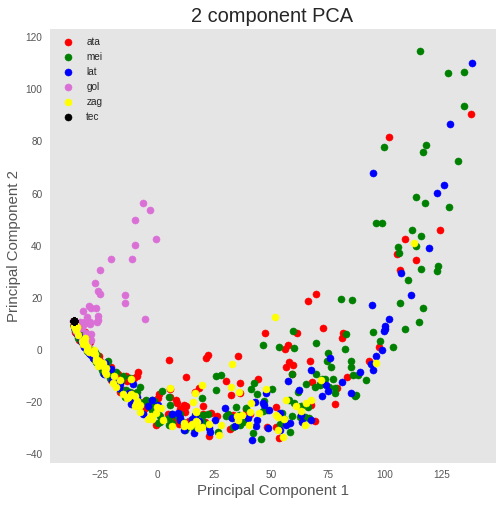

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(.95)#.fit(players_distances)

principalComponents = pca.fit_transform(players_distances)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, filtered_rodada[['atletas.posicao_id']]], axis = 1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['ata', 'mei', 'lat', 'gol', 'zag', 'tec']

colors = ['r', 'g', 'b', 'orchid', 'yellow', 'k']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['atletas.posicao_id'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [0]:
components = pd.DataFrame(pca.components_, columns = ['ata', 'mei', 'lat', 'gol', 'zag', 'tec'], index=[1, 2])
components



,ata,mei,lat,gol,zag,tec
1,0.627101,-0.434685,-0.168040,0.247929,-0.439546,0.367270
2,0.184490,0.315520,0.626903,0.588288,0.253318,0.251297


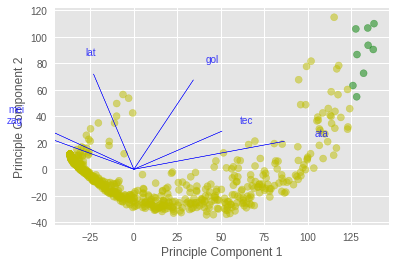

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

  
    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax
T = pca.transform(players_distances)
ax = draw_vectors(T, pca.components_, ['ata', 'mei', 'lat', 'gol', 'zag', 'tec'])
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 125, 'color'] = 'g'
T_df.loc[T_df['component2'] > 125, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.figure(figsize=(8,8))
plt.show()

#  Clustering atack players using total finalizations per goal scored with price


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

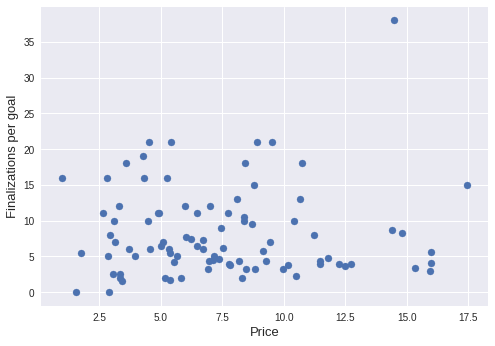

In [0]:
import matplotlib.pyplot as plt
atack_players = filtered_rodada[filtered_rodada["atletas.posicao_id"] == 'ata']

#Nova coluna: finalizações por gol marcado
atack_players['FPG'] = (atack_players["FD"] + atack_players["FF"] + atack_players["FT"]) / atack_players["G"]

plt.scatter(atack_players["atletas.preco_num"], atack_players['FPG'])
plt.xlabel('Price', fontsize=13)
plt.ylabel('Finalizations per goal', fontsize=13)
plt.show


<function matplotlib.pyplot.show>

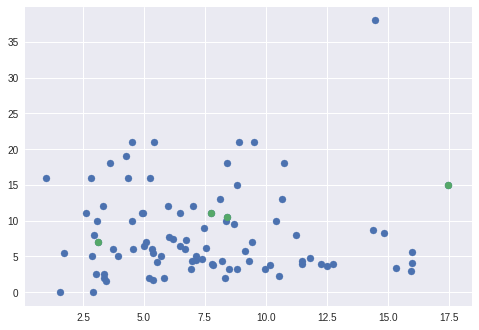

In [0]:
import numpy as np

num_clusters = 5

# Use numpy's random function to generate a list, 
# length: num_clusters, of indices
random_initial_points = np.random.choice(atack_players.index, size=num_clusters)

# Use the random indices to create the centroids
centroids = atack_players.loc[random_initial_points]

plt.scatter(atack_players["atletas.preco_num"], atack_players["FPG"])
plt.scatter( centroids["atletas.preco_num"],  centroids["FPG"])
plt.show


In [0]:
def centroids_to_dict(centroids, col1, col2):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row[col1], row[col2]]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary



In [0]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance



In [0]:
def assign_to_cluster(row, col1, col2):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row[col1], row[col2]]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster



In [0]:
# Visualizing clusters
def visualize_clusters(df, num_clusters, col1, col2, label1, label2):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df[col1], clustered_df[col2], c=colors[n-1])
        plt.xlabel(label1, fontsize=13)
        plt.ylabel(label2, fontsize=13)
    plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


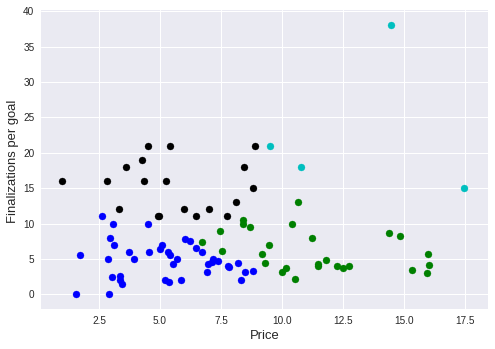

In [0]:
centroids_dict = centroids_to_dict(centroids, "atletas.preco_num", "FPG")
atack_players['cluster'] = atack_players.apply(lambda row: assign_to_cluster(row,"atletas.preco_num", "FPG"), axis=1)
visualize_clusters(atack_players, num_clusters, "atletas.preco_num", "FPG", 'Price', 'Finalizations per goal ')



#   Clustering goalkeepers using total defences per scored goals with price

---




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<function matplotlib.pyplot.show>

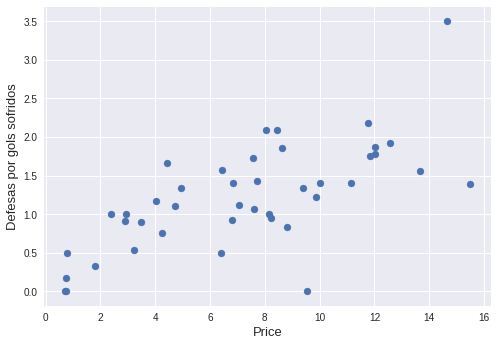

In [5]:
import matplotlib.pyplot as plt
goalkeepers = filtered_rodada[filtered_rodada["atletas.posicao_id"] == 'gol']

#Nova coluna: defesas por gols sofridos
goalkeepers['DPGS'] = (goalkeepers["DD"] + goalkeepers["DP"] ) / goalkeepers["GS"]

plt.scatter(goalkeepers["atletas.preco_num"], goalkeepers['DPGS'])
plt.xlabel('Price', fontsize=13)
plt.ylabel('Defesas por gols sofridos', fontsize=13)
plt.show

<function matplotlib.pyplot.show>

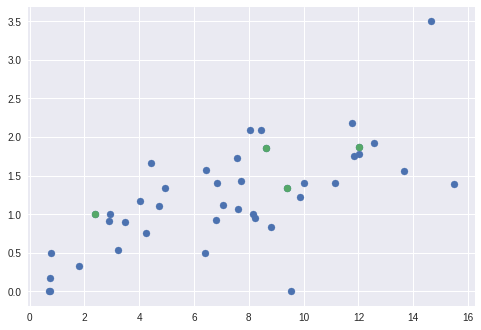

In [16]:
import numpy as np

num_clusters = 5

# Use numpy's random function to generate a list, 
# length: num_clusters, of indices
random_initial_points = np.random.choice(goalkeepers.index, size=num_clusters)

# Use the random indices to create the centroids
centroids = goalkeepers.loc[random_initial_points]

plt.scatter(goalkeepers["atletas.preco_num"], goalkeepers["DPGS"])
plt.scatter( centroids["atletas.preco_num"],  centroids["DPGS"])
plt.show

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


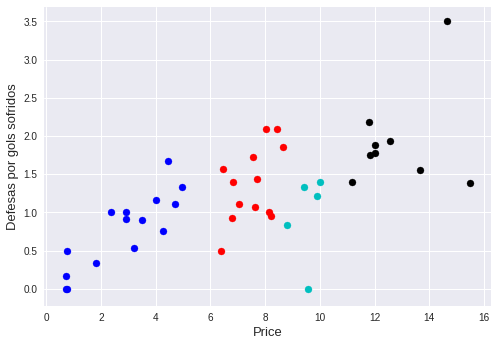

In [17]:
centroids_dict = centroids_to_dict(centroids, "atletas.preco_num" , "DPGS")
goalkeepers['cluster'] = goalkeepers.apply(lambda row: assign_to_cluster(row, "atletas.preco_num" , 'DPGS'), axis=1)
visualize_clusters(goalkeepers, num_clusters,  "atletas.preco_num" , 'DPGS', 'Price', 'Defesas por gols sofridos')



# Multiclass classification of 2017


## Read the data

In [18]:
# put your code here
import pandas as pd

rodada_2017 = pd.read_csv("2017_scouts_raw.csv")

rodada_2017 = rodada_2017.fillna(0)

col_target = ['A', 'CA', 'CV', 'DD', 'DP', 'FC', 'FD', 'FF', 'FS', 'FT', 'G', 'GC', 'GS', 'I', 'PE', 'PP', 'RB', 'SG', 'atletas.posicao_id']

rodada_2017 = rodada_2017[col_target]
columns = ['A', 'CA', 'CV', 'DD', 'DP', 'FC', 'FD', 'FF', 'FS', 'FT', 'G', 'GC', 'GS', 'I', 'PE', 'PP', 'RB', 'SG']
rodada_2017.describe()

,A,CA,CV,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,PE,PP,RB,SG
count,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000
mean,0.363768,0.986238,0.041101,0.671254,0.017064,6.770088,1.384596,2.005184,6.392681,0.095193,0.508486,0.008856,0.524685,0.754258,13.641909,0.022371,6.083961,0.777123
std,0.943894,1.647397,0.205552,4.661113,0.197616,10.642599,3.049678,3.894595,11.380439,0.353137,1.370731,0.094346,3.558487,2.108257,21.580984,0.157195,10.908058,2.056078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,0.000000,7.000000,0.000000
max,11.000000,12.000000,2.000000,81.000000,4.000000,83.000000,40.000000,41.000000,122.000000,4.000000,18.000000,2.000000,51.000000,32.000000,189.000000,2.000000,94.000000,17.000000


## Decision tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


train, test = train_test_split(rodada_2017, test_size = 0.3)


clf = DecisionTreeClassifier(random_state=1, min_samples_split=13, max_depth=7)

# fit using columns and atletas positions in
clf.fit(train[columns], train["atletas.posicao_id"])

predictions = clf.predict(train[columns])
accuracy = accuracy_score(train["atletas.posicao_id"], predictions)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))


predictions = clf.predict(test[columns])
accuracy = accuracy_score(test["atletas.posicao_id"], predictions)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.5730659025787965
DecisionTreeClassifier accuracy score: 0.5597037951249614


## Using gridSearch to improve the accuracy and reduce overfitting

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'min_samples_split': [13, 14, 15, 30,40,50,60,70,80,90,100], 
               'max_depth': [1,2,3,4,5,6,7,8,9,10,11]
              }
             ]

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(tree, 
                           param_grid, 
                           cv=5,
                           scoring='accuracy')


grid_search.fit(train[columns], train["atletas.posicao_id"])

predictions = grid_search.predict(train[columns])
accuracy = accuracy_score(train["atletas.posicao_id"], predictions)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

predictions = grid_search.predict(test[columns])
accuracy = accuracy_score(test["atletas.posicao_id"], predictions)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.6370729556975975
DecisionTreeClassifier accuracy score: 0.6288182659672941


## Random forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier

train, test = train_test_split(rodada_2017, test_size = 0.3)


clf = RandomForestClassifier(random_state=1)

# fit using columns and atletas positions in
clf.fit(train[columns], train["atletas.posicao_id"])

predictions = clf.predict(train[columns])
accuracy = accuracy_score(train["atletas.posicao_id"], predictions)
print('RandomForestClassifier accuracy score: {}'.format(accuracy))


predictions = clf.predict(test[columns])
accuracy = accuracy_score(test["atletas.posicao_id"], predictions)
print('RandomForestClassifier accuracy score: {}'.format(accuracy))


RandomForestClassifier accuracy score: 0.7218867092792595
RandomForestClassifier accuracy score: 0.6884706366347835


## Using gridSearch to improve the accuracy and reduce overfitting

In [30]:
from sklearn.model_selection import GridSearchCV

# hyperparameters values
# param_grid[0] - 12 combinations
# param_grid[1] - 6 combinations
param_grid = [{'n_estimators': [3, 10, 30], 
               'max_features': [2, 4, 6, 8]
              },
              {'bootstrap': [False], 
               'n_estimators': [3, 10],
               'max_features': [2, 3, 4]
              }
             ]

# create a randomforeestregressor model
forest = RandomForestClassifier()

# run the grid search with cross validation
# (12 + 6) x 5 = 90 combinations
grid_search = GridSearchCV(forest, 
                           param_grid, 
                           cv=5,
                           scoring='accuracy')


# it may take quite a long time
grid_search.fit(train[columns], train["atletas.posicao_id"])


predictions = grid_search.predict(train[columns])
accuracy = accuracy_score(train["atletas.posicao_id"], predictions)
print('RandomForestClassifier accuracy score: {}'.format(accuracy))


predictions = grid_search.predict(test[columns])
accuracy = accuracy_score(test["atletas.posicao_id"], predictions)
print('RandomForestClassifier accuracy score: {}'.format(accuracy))

RandomForestClassifier accuracy score: 0.7227242671368745
RandomForestClassifier accuracy score: 0.6921731975727656
